# Clusterización

La intención de este documento es clasificar los archivos en 3 tipo de clima, soleado, nublado y lluvioso.
A pesar de que ya existe una columna con el tipo de cielo, en modo de réplica de los artículos aplicaremos técnicas de clusterización para dividir la información.

## K-Means

En este apartado vamos a usar K-Means para 3 de los 4 artículos y los datos de la técnica propuesta, es decir, modificaremos el archivo base y el de Photovoltaic.

### Base

In [1]:
import pandas as pd
datos = pd.read_excel('02.Generación Pearson.xlsx')
datos.dtypes

Fecha               datetime64[ns]
Generación                 float64
Índice UV                  float64
Temperatura                  int64
Hora                         int64
DPT                          int64
Cobertura Nubes              int64
Condición Cielo              int64
Humedad Relativa             int64
dtype: object

In [5]:
#Importaciones
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [10]:
#Estandarizamos por min max
scaler = MinMaxScaler()
datos_scaled = datos.copy()

col_num = datos_scaled.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
datos_scaled[col_num] = scaler.fit_transform(datos_scaled[col_num])
datos_scaled.sample(4)

,Fecha,Generación,Índice UV,Temperatura,Hora,DPT,Cobertura Nubes,Condición Cielo,Humedad Relativa
265,2022-09-12 01:00:00,0.000000,0.000000,0.435897,0.000000,0.70,0.52,0.50,0.804124
1173,2022-10-19 21:00:00,0.000000,0.000000,0.384615,0.833333,0.35,0.79,0.75,0.556701
17743,2024-09-10 06:00:00,0.000000,0.000000,0.410256,0.208333,0.70,1.00,1.00,0.855670
4885,2023-03-23 12:00:00,0.997167,0.642857,0.589744,0.458333,0.45,0.08,0.00,0.391753


In [11]:
#datos sin generacion
clima = datos_scaled[['Índice UV', 'Temperatura', 'Hora', 'DPT', 'Cobertura Nubes', 'Condición Cielo', 'Humedad Relativa']]
clima.sample(4)

,Índice UV,Temperatura,Hora,DPT,Cobertura Nubes,Condición Cielo,Humedad Relativa
16484,0.071429,0.615385,0.750000,0.75,0.78,0.75,0.577320
1193,0.142857,0.641026,0.666667,0.30,1.00,0.75,0.268041
4887,0.642857,0.717949,0.541667,0.30,0.10,0.00,0.216495
1786,0.142857,0.307692,0.333333,0.55,0.50,0.50,0.927835


In [12]:
k_values = range(1, 11)
inertias = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clima)
    inertias.append(kmeans.inertia_)

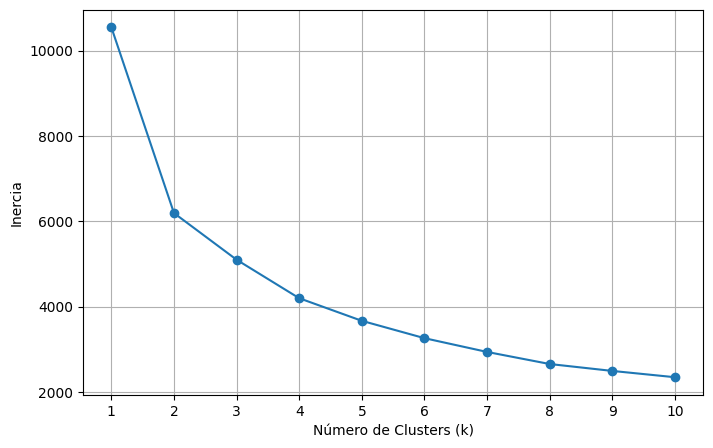

In [13]:
plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(clima)
    score = silhouette_score(clima, labels)
    silhouettes.append(score)

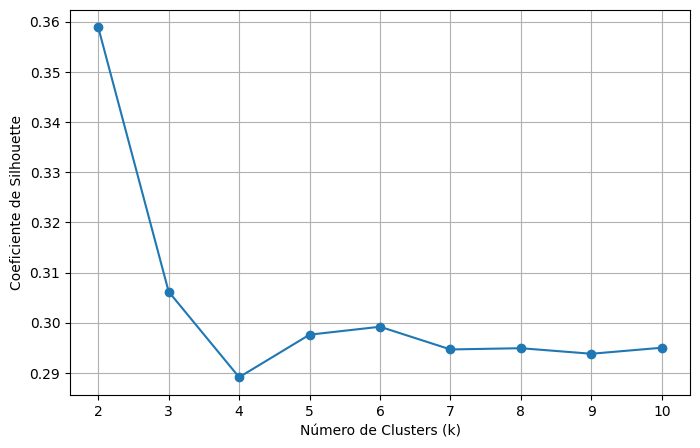

In [15]:
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouettes, marker = 'o', linestyle = '-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente de Silhouette")
plt.xticks(k_values)
plt.grid(True)
plt.show()

Para n_clusters = 2, el promedio de silueta es: 0.820


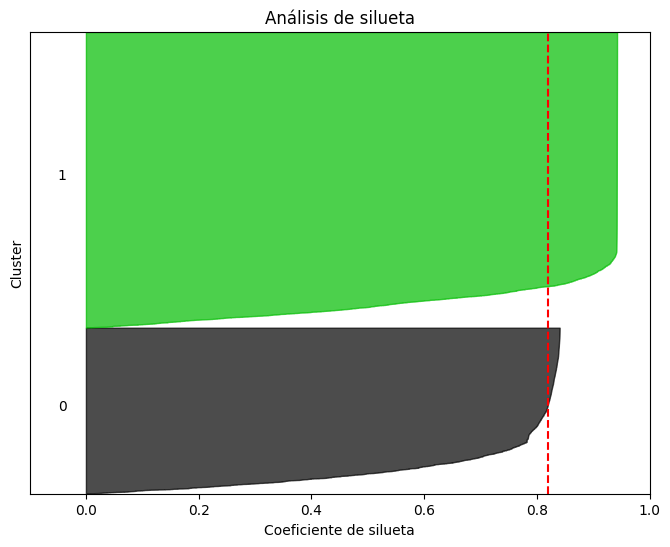

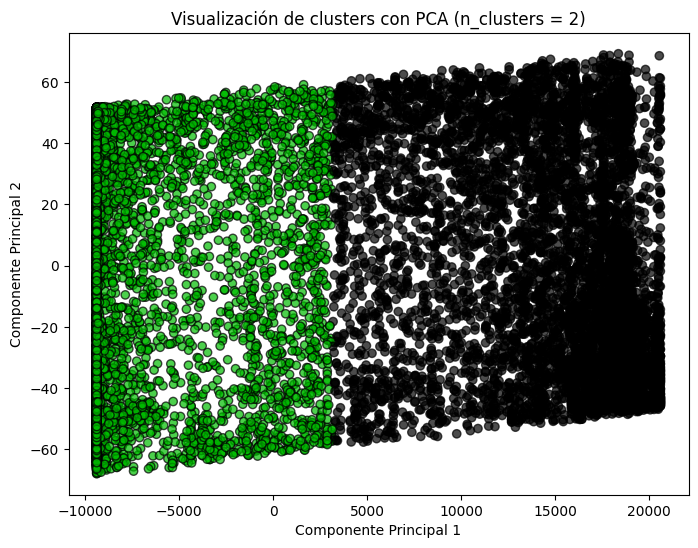

Para n_clusters = 3, el promedio de silueta es: 0.812


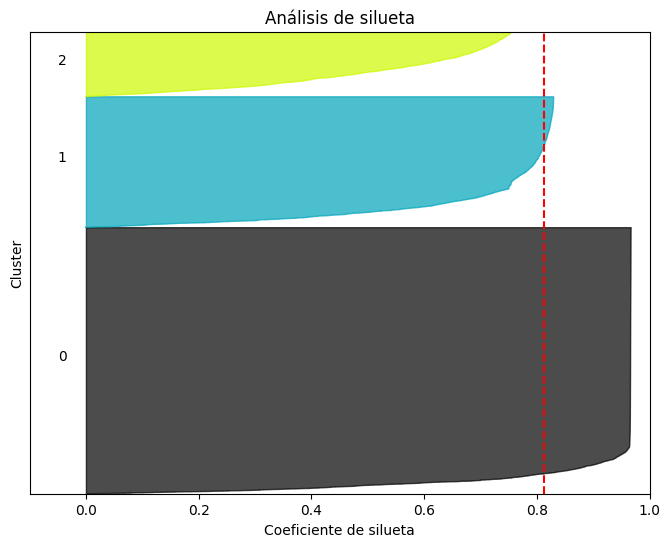

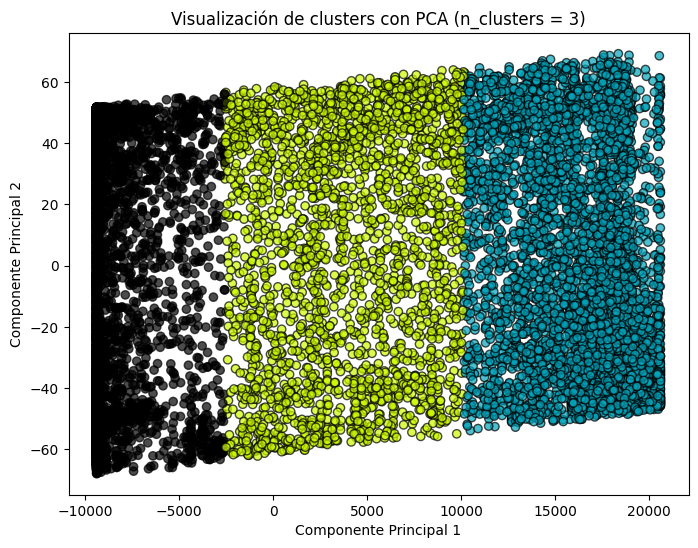

Para n_clusters = 4, el promedio de silueta es: 0.788


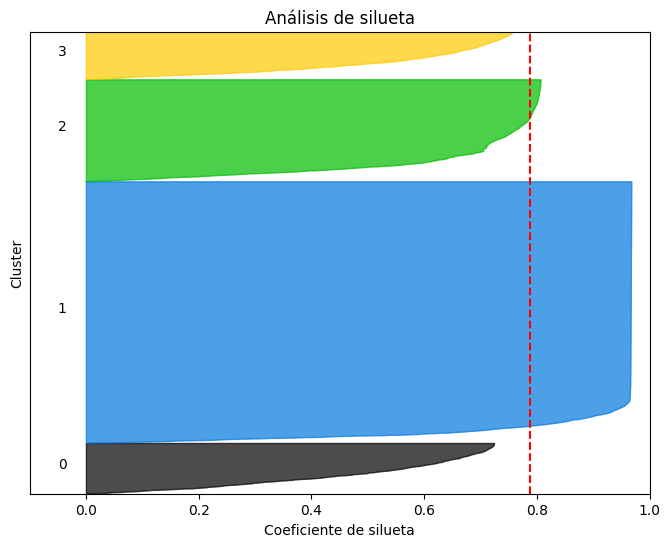

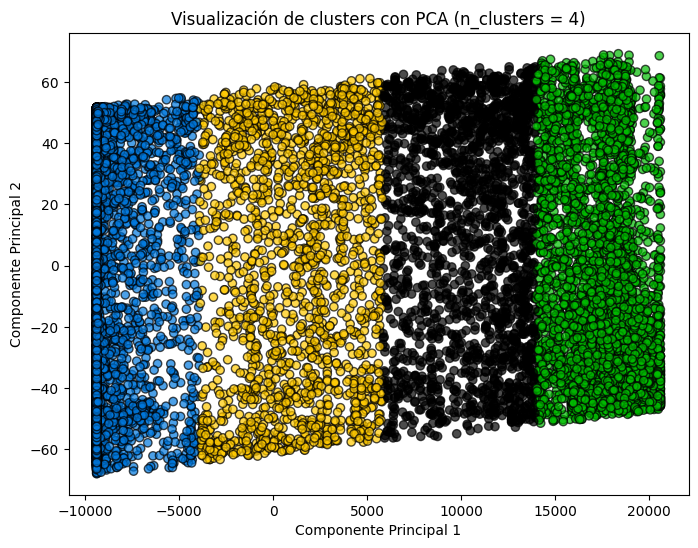

Para n_clusters = 5, el promedio de silueta es: 0.778


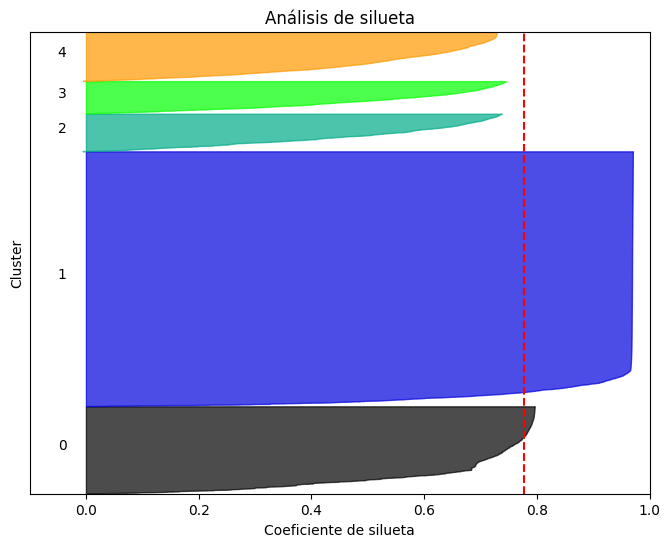

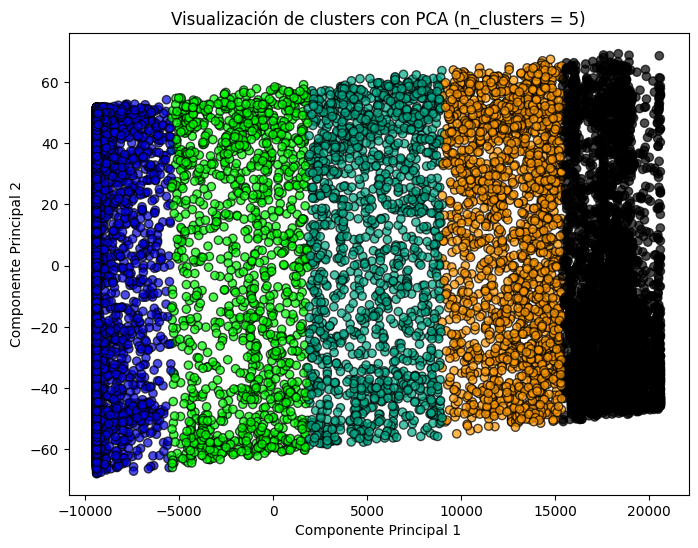

Para n_clusters = 6, el promedio de silueta es: 0.769


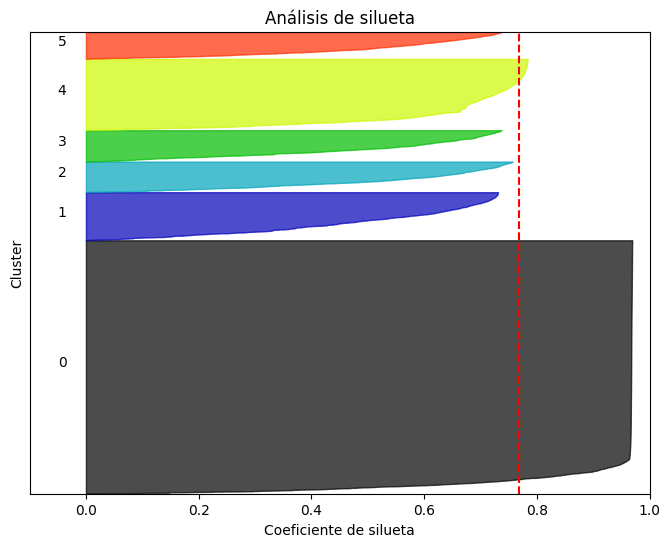

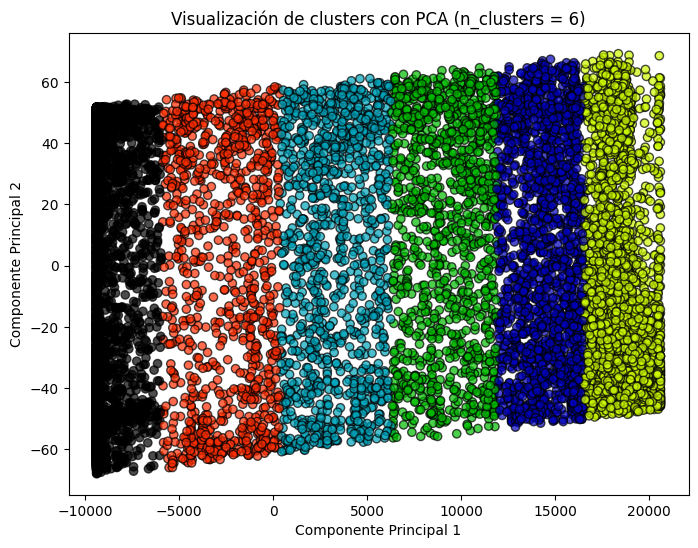

In [4]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supongamos que df es tu DataFrame
# Seleccionamos las columnas numéricas para el clustering
features = ['Generación', 'Índice UV', 'Temperatura', 'Hora', 'DPT', 
            'Cobertura Nubes', 'Condición Cielo', 'Humedad Relativa']

X = datos[features]

# Definir el rango de clusters a evaluar
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Aplicar K-Means
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calcular coeficiente de silueta
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, el promedio de silueta es: {silhouette_avg:.3f}")

    # Calcular valores individuales de silueta
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Graficar silueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Análisis de silueta")
    ax1.set_xlabel("Coeficiente de silueta")
    ax1.set_ylabel("Cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    plt.show()

    # **Visualización de Clusters con PCA**
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7, edgecolor="k")
    plt.title(f"Visualización de clusters con PCA (n_clusters = {n_clusters})")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.show()

    # Guardamos los clusters en el DataFrame original
    X[f'Cluster_{n_clusters}'] = cluster_labels
